# Taller Pandas Data Frame
---------------------

### NumPy:
* Low Level Data Structure (np.array)
* Suport large multi-dimensional array and matrices
* Soporte a muchas operaciones matematicas </q>

### Pandas:
* Structuras de datos de alto nivel (DataFrames)
* Opreraciones de agregacion, merge and join
* Manejo de Series

![title](ThePythonStack.png)

-----------------------
### Importamos las librerias para trabajar

In [1]:
import numpy as np
import pandas as pd

## Construccion de Data Frames

### Empezando con Array y Series

In [587]:
miarray = np.array([
                    [1,2,3,5,7],
                    [4,3,2,1,0],
                    [12,43,32,54,98]
                   ])
miarray.shape

(3, 5)

In [597]:
miarray[:,0::3]

array([[ 1,  5],
       [ 4,  1],
       [12, 54]])

In [614]:
miserie = pd.Series([1,2,3])
miserie.isin(['1'])

0     True
1    False
2    False
dtype: bool

In [619]:
miserie + miserie

0    2
1    4
2    6
dtype: int64

In [623]:
l1 = [1,2,3]
l2 = [2,3,4]
l1 + l2

[1, 2, 3, 2, 3, 4]

In [622]:
type(a1)

list

In [629]:
a1 = np.array([1,2,3])
a2 = np.array([1,2,3])
a1 * a2

array([1, 4, 9])

### Construyendo Data Frames

In [78]:
df = pd.DataFrame([['a',1,'&'], ['b',2,'/'], ['c',3,'@']], columns = ['Col1', 'Col2', 'Col3'], index = ['K1', 'K2', 'K3'])
df

,Col1,Col2,Col3
K1,a,1,&
K2,b,2,/
K3,c,3,@


### Contruccioon con diccionario

In [84]:
d = { 'Col1': ['a', 'b', 'c'], 'Col2': [1, 2, 3], 'Col3' : ['1971/01/01', '2000/08/25', '2019/05/2']}
d

{'Col1': ['a', 'b', 'c'],
 'Col2': [1, 2, 3],
 'Col3': ['1971/01/01', '2000/08/25', '2019/05/2']}

In [100]:
df = pd.DataFrame(d, index = ['I1', 'I2', 'I3'])
df

,Col1,Col2,Col3
I1,a,1,1971/01/01
I2,b,2,2000/08/25
I3,c,3,2019/05/2


In [101]:
df.dtypes

Col1    object
Col2     int64
Col3    object
dtype: object

In [106]:
pd.to_datetime(df.Col3)

I1   1971-01-01
I2   2000-08-25
I3   2019-05-02
Name: Col3, dtype: datetime64[ns]

In [109]:
df.Col3 = pd.to_datetime(df.Col3)

In [111]:
df.dtypes

Col1            object
Col2             int64
Col3    datetime64[ns]
dtype: object

In [112]:
df

,Col1,Col2,Col3
I1,a,1,1971-01-01
I2,b,2,2000-08-25
I3,c,3,2019-05-02


### Leyendo de Archivos

In [141]:
dfPersonas = pd.read_csv('Personas.csv', parse_dates = [4], infer_datetime_format = True, dtype = {'FNac': 'datetime64[ns]'})
dfPersonas

,CI,Nombre,Sexo,Telefono,FNac
0,35874773,Rafael Harispe,M,9552992,1971-02-05


In [142]:
dfPersonas.dtypes

CI                    int64
 Nombre              object
 Sexo                object
 Telefono             int64
 FNac        datetime64[ns]
dtype: object

In [145]:
dfMasPersonas = pd.read_csv('.\MasPersonas.csv', parse_dates = [4])
dfMasPersonas

,CI,Nombre,Sexo,Telefono,FNac
0,17477171,Silvana Collazo,F,0,1980-01-01


In [146]:
pd.concat([dfPersonas, dfMasPersonas])

,CI,Nombre,Sexo,Telefono,FNac
0,35874773,Rafael Harispe,M,9552992,1971-02-05
0,17477171,Silvana Collazo,F,0,1980-01-01


### Leyendo de Excel

In [476]:
dfP = pd.read_excel('Personas.xlsx', sheet_name = 'Hoja1')
dfP

,Nombre,Apellido,Direccion,Telefono
0,Rafael,Harispe,Verdi 4622,95529992


## Accesando al Data Frame

In [252]:
## Columnas como atributos
df.Col1

I1    a
I2    b
I3    c
Name: Col1, dtype: object

In [253]:
## Operador de acceso [] con lista de strings, espera una lista de columnas
df['Col1']

I1    a
I2    b
I3    c
Name: Col1, dtype: object

In [194]:
df[['Col1','Col3']]

,Col1,Col3
I1,a,1971-01-01
I2,b,2000-08-25
I3,c,2019-05-02


In [267]:
## Opoerador de acceso [] con sintaxis ::
## Espera indices de filas desde:hasta:salto
df['I1':'I3':2]

,Col1,Col2,Col3
I1,a,1,1971-01-01
I3,c,3,2019-05-02


In [268]:
## Opoerador de acceso [] con sintaxis ::
## Espera indices de filas desde:hasta:salto
df[:-1:2]

,Col1,Col2,Col3
I1,a,1,1971-01-01


In [269]:
## Operador [] con array de boleanos
## Será especialmente util en busquedas
df[[True, False, True]]

,Col1,Col2,Col3
I1,a,1,1971-01-01
I3,c,3,2019-05-02


#### Trabajando con loc

In [79]:
df.loc['K1', 'Col2']

1

In [80]:
df.loc[['K1', 'K2'], 'Col2']

K1    1
K2    2
Name: Col2, dtype: int64

In [81]:
df.loc['K1': 'K3', :]

,Col1,Col2,Col3
K1,a,1,&
K2,b,2,/
K3,c,3,@


In [147]:
df[['Col1', 'Col2']]

,Col1,Col2
I1,a,1
I2,b,2
I3,c,3


### Trabajando con iloc

In [151]:
df.iloc[[0,2] , [0, 2]]

,Col1,Col3
I1,a,1971-01-01
I3,c,2019-05-02


### Buscando den Data Frames

In [279]:
df.Col1 == 'a'

I1     True
I2    False
I3    False
Name: Col1, dtype: bool

In [275]:
df

,Col1,Col2,Col3
I1,a,1,1971-01-01
I2,b,2,2000-08-25
I3,c,3,2019-05-02


In [273]:
df[df.Col2 == 2]

,Col1,Col2,Col3
I2,b,2,2000-08-25


In [274]:
df[(df.Col1 == 'a') | (df.Col2 == 3)]

,Col1,Col2,Col3
I1,a,1,1971-01-01
I3,c,3,2019-05-02


In [299]:
df.Col1.isin(['a', 'b'])

I1     True
I2     True
I3    False
Name: Col1, dtype: bool

In [284]:
df[df.Col1.isin(['a', 'b'])]

,Col1,Col2,Col3
I1,a,1,1971-01-01
I2,b,2,2000-08-25


In [300]:
df[df.Col2 >= 2]

,Col1,Col2,Col3
I2,b,2,2000-08-25
I3,c,3,2019-05-02


In [309]:
## Agregar Columnas
df['Col4'] = df.Col2 * 10

In [339]:
df

,Col1,Col2,Col3,Col4
I1,a,1,1971-01-01,100
I2,b,2,2000-08-25,20
I3,c,3,2019-05-02,30


In [338]:
df.iloc[0, 3] = 100

## Llenando datos faltantes

In [513]:
dfFNA = pd.read_csv('MasPersonas.csv', parse_dates = ['FNac'])
dfFNA

,CI,Nombre,Sexo,Telefono,FNac
0,17477171,Silvana Collazo,F,0,1980-01-01
1,35874773,Rafael Harispe,M,9552992,1971-02-05
2,1231233,NaN,NaN,99998898,NaT


In [529]:
dfFNA.fillna({ 'Nombre':'notiene@notiene', 'Sexo':'?', 'FNac': np.datetime64('1970-01-01')})

,CI,Nombre,Sexo,Telefono,FNac
0,17477171,Silvana Collazo,F,0,1980-01-01
1,35874773,Rafael Harispe,M,9552992,1971-02-05
2,1231233,notiene@notiene,?,99998898,1970-01-01


In [530]:
dfFNA.fillna({ 'Nombre':'notiene@notiene', 'Sexo':'?', 'FNac': dfFNA.FNac.min()})

,CI,Nombre,Sexo,Telefono,FNac
0,17477171,Silvana Collazo,F,0,1980-01-01
1,35874773,Rafael Harispe,M,9552992,1971-02-05
2,1231233,notiene@notiene,?,99998898,1971-02-05


In [532]:
dfFNA.fillna(method = 'ffill')

,CI,Nombre,Sexo,Telefono,FNac
0,17477171,Silvana Collazo,F,0,1980-01-01
1,35874773,Rafael Harispe,M,9552992,1971-02-05
2,1231233,Rafael Harispe,M,99998898,1971-02-05


In [534]:
dfFNA.interpolate()

,CI,Nombre,Sexo,Telefono,FNac
0,17477171,Silvana Collazo,F,0,1980-01-01
1,35874773,Rafael Harispe,M,9552992,1971-02-05
2,1231233,NaN,NaN,99998898,NaT


In [546]:
dfFNA.dropna()

,CI,Nombre,Sexo,Telefono,FNac
0,17477171,Silvana Collazo,F,0,1980-01-01
1,35874773,Rafael Harispe,M,9552992,1971-02-05


In [542]:
s = pd.Series([1,2,np.nan,4])
s

0    1.0
1    2.0
2    NaN
3    4.0
dtype: float64

In [545]:
s.interpolate()

0    1.0
1    2.0
2    3.0
3    4.0
dtype: float64

## Extras

In [367]:
rows, cols = df.shape

In [368]:
rows,cols

(3, 4)

In [156]:
df.head()
df.tail(2)

,Col1,Col2,Col3
I2,b,2,2000-08-25
I3,c,3,2019-05-02


In [251]:
df.columns

Index(['Col1', 'Col2', 'Col3'], dtype='object')

In [159]:
df.values

array([['a', 1, Timestamp('1971-01-01 00:00:00')],
       ['b', 2, Timestamp('2000-08-25 00:00:00')],
       ['c', 3, Timestamp('2019-05-02 00:00:00')]], dtype=object)

In [160]:
df.index

Index(['I1', 'I2', 'I3'], dtype='object')

In [163]:
df.describe()

,Col2
count,3.0
mean,2.0
std,1.0
min,1.0
25%,1.5
50%,2.0
75%,2.5
max,3.0


In [164]:
df.dtypes

Col1            object
Col2             int64
Col3    datetime64[ns]
dtype: object

In [347]:
df.sort_values('Col3', ascending = False)

,Col1,Col2,Col3,Col4
I3,c,3,2019-05-02,30
I2,b,2,2000-08-25,20
I1,a,1,1971-01-01,100


In [352]:
## Renombrando Columnas
df.rename(columns = {'Col1':'Columna1', 'Col4': 'Columna4'})

,Columna1,Col2,Col3,Columna4
I1,a,1,1971-01-01,100
I2,b,2,2000-08-25,20
I3,c,3,2019-05-02,30


In [358]:
## Iterando las filas
for index, row in df.iterrows():
    print(index)
    print(row)

I1
Col1                      a
Col2                      1
Col3    1971-01-01 00:00:00
Col4                    100
Name: I1, dtype: object
I2
Col1                      b
Col2                      2
Col3    2000-08-25 00:00:00
Col4                     20
Name: I2, dtype: object
I3
Col1                      c
Col2                      3
Col3    2019-05-02 00:00:00
Col4                     30
Name: I3, dtype: object


In [364]:
## Guardar CSV
df.to_csv('salida.csv')

In [363]:
!type salida.csv

,Col1,Col2,Col3,Col4
I1,a,1,1971-01-01,100
I2,b,2,2000-08-25,20
I3,c,3,2019-05-02,30


In [250]:
data = np.random.randn(40, 4)
df1 = pd.DataFrame(data,
                    columns=list('ABCD'),
                    index=pd.date_range('20130101', periods=40, freq='W'))
df1.head()

,A,B,C,D
2013-01-06,0.717385,0.005616,0.393080,-1.525174
2013-01-13,-0.240745,0.135214,-0.086664,-0.189748
2013-01-20,0.542692,-1.781118,1.482630,-0.541072
2013-01-27,0.069416,1.332445,2.021756,-1.119044
2013-02-03,2.194507,-1.092941,0.467871,-0.097850


In [227]:
df1['20130101':'20130131']

,A,B,C,D
2013-01-01,0.190731,-0.780170,0.299784,-0.197884
2013-01-02,2.204171,-0.375493,-1.067065,-1.155903
2013-01-03,-0.165879,-1.387984,1.628831,-0.730419
2013-01-04,0.950716,-0.043532,-0.767319,-0.131111
2013-01-05,-1.246697,-0.923133,1.690776,1.454780


In [423]:
## Lectura desde una url
df1 = pd.read_csv("http://pythonhow.com/data/income_data.csv")

In [424]:
df1.describe()

,2005,2006,2007,2008,2009,2010,2011,2012,2013
count,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000
mean,45339.800000,46680.600000,49789.800000,50395.800000,47999.00000,47709.400000,48662.200000,50038.800000,50113.400000
std,8586.880615,9195.672966,9415.639633,9906.997487,10630.62477,8303.656201,6893.345538,10094.581873,9446.102122
min,36658.000000,37057.000000,40795.000000,39586.000000,36538.00000,38587.000000,41302.000000,39018.000000,39919.000000
25%,37150.000000,37952.000000,42212.000000,44476.000000,39980.00000,40933.000000,42590.000000,43464.000000,41381.000000
50%,45245.000000,46657.000000,47215.000000,46914.000000,45739.00000,46896.000000,48621.000000,47044.000000,50602.000000
75%,51755.000000,55319.000000,55734.000000,57014.000000,56134.00000,54283.000000,53367.000000,57020.000000,57528.000000
max,55891.000000,56418.000000,62993.000000,63989.000000,61604.00000,57848.000000,57431.000000,63648.000000,61137.000000


In [425]:
df1.shape

(5, 11)

### Funciones de agregacion

In [374]:
df1['2005'].agg(['max', 'min', 'mean'])

max     55891.0
min     36658.0
mean    45339.8
Name: 2005, dtype: float64

In [379]:
df1.max()

GEOID     04000US06
State    California
2005          55891
2006          56418
2007          62993
2008          63989
2009          61604
2010          57848
2011          57431
2012          63648
2013          61137
dtype: object

In [389]:
df1.agg(['max', 'min', 'std', 'mean'])

,GEOID,State,2005,2006,2007,2008,2009,2010,2011,2012,2013
max,04000US06,California,55891.000000,56418.000000,62993.000000,63989.000000,61604.00000,57848.000000,57431.000000,63648.000000,61137.000000
min,04000US01,Alabama,36658.000000,37057.000000,40795.000000,39586.000000,36538.00000,38587.000000,41302.000000,39018.000000,39919.000000
std,NaN,NaN,8586.880615,9195.672966,9415.639633,9906.997487,10630.62477,8303.656201,6893.345538,10094.581873,9446.102122
mean,NaN,NaN,45339.800000,46680.600000,49789.800000,50395.800000,47999.00000,47709.400000,48662.200000,50038.800000,50113.400000


In [386]:
df1.std()

2005     8586.880615
2006     9195.672966
2007     9415.639633
2008     9906.997487
2009    10630.624770
2010     8303.656201
2011     6893.345538
2012    10094.581873
2013     9446.102122
dtype: float64

In [387]:
df1.std(axis = 1)

0    2431.817125
1    3218.830188
2    1582.760546
3    1765.581522
4    1905.890678
dtype: float64

In [390]:
df1['Suma Total'] = df1.sum(axis = 1)

In [392]:
df1

,GEOID,State,2005,2006,2007,2008,2009,2010,2011,2012,2013,Suma Total
0,04000US01,Alabama,37150,37952,42212,44476,39980,40933,42590,43464,41381,370138
1,04000US02,Alaska,55891,56418,62993,63989,61604,57848,57431,63648,61137,540959
2,04000US04,Arizona,45245,46657,47215,46914,45739,46896,48621,47044,50602,424933
3,04000US05,Arkansas,36658,37057,40795,39586,36538,38587,41302,39018,39919,349460
4,04000US06,California,51755,55319,55734,57014,56134,54283,53367,57020,57528,498154


In [404]:
df1['2005'].idxmin()

3

In [418]:
df1.loc[df1['2005'].idxmin(),]

GEOID         04000US05
State          Arkansas
2005              36658
2006              37057
2007              40795
2008              39586
2009              36538
2010              38587
2011              41302
2012              39018
2013              39919
Suma Total       349460
Name: 3, dtype: object

In [420]:
df1[df1['2005'] < df1['2005'].max() - 10]

,GEOID,State,2005,2006,2007,2008,2009,2010,2011,2012,2013,Suma Total
0,04000US01,Alabama,37150,37952,42212,44476,39980,40933,42590,43464,41381,370138
2,04000US04,Arizona,45245,46657,47215,46914,45739,46896,48621,47044,50602,424933
3,04000US05,Arkansas,36658,37057,40795,39586,36538,38587,41302,39018,39919,349460
4,04000US06,California,51755,55319,55734,57014,56134,54283,53367,57020,57528,498154


# Graficando DataFrames

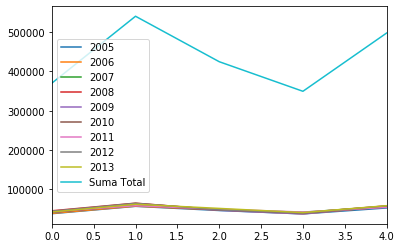

In [422]:
df1.plot()

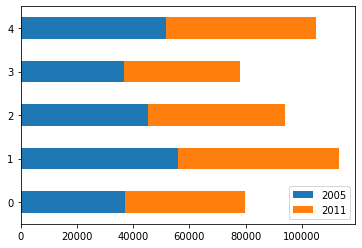

In [433]:
df1[['2005', '2011']].plot(kind = 'barh', stacked = True)

In [442]:
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
        'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])
df4

,a,b,c
0,-0.452070,-0.487711,-0.254750
1,2.064457,-1.640680,-1.755004
2,-0.543961,1.273376,-1.233636
3,2.612145,-0.509366,-2.170712
4,1.224905,-2.028690,-0.483199
...,...,...,...
995,2.362002,0.307143,-0.912419
996,1.991977,-2.007455,-0.987188
997,-0.371595,0.647925,-2.157712
998,2.178013,-1.537201,-2.186039


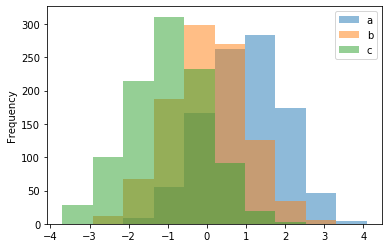

In [443]:
df4.plot(kind='hist', alpha=0.5)

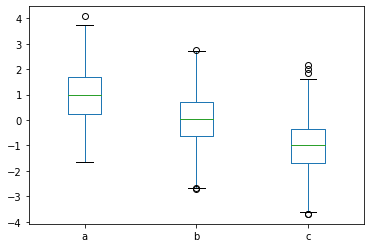

In [444]:
df4.plot(kind='box')

In [462]:
df5 = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])


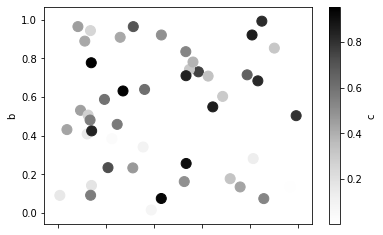

In [465]:
df5.plot(kind='scatter', x='a', y='b', c = 'c', s = 100);

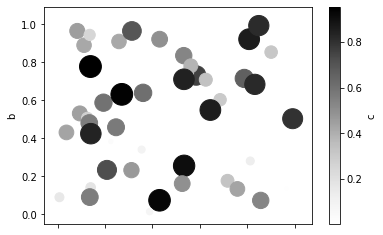

In [466]:
df5.plot(kind='scatter', x='a', y='b', c = 'c', s = df5['c']*500)